In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
diabetes=datasets.load_diabetes()

In [3]:
x=diabetes.data
y=diabetes.target
col1=diabetes.feature_names

In [4]:
df=pd.DataFrame(x,columns=col1)

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [7]:
import seaborn as sns

<Axes: >

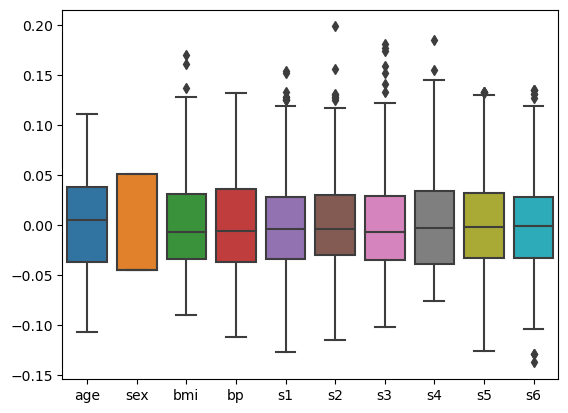

In [8]:
sns.boxplot(df)

In [9]:
df.clip(df.quantile(0.25),df.quantile(0.75),axis=1,inplace=True)

<Axes: >

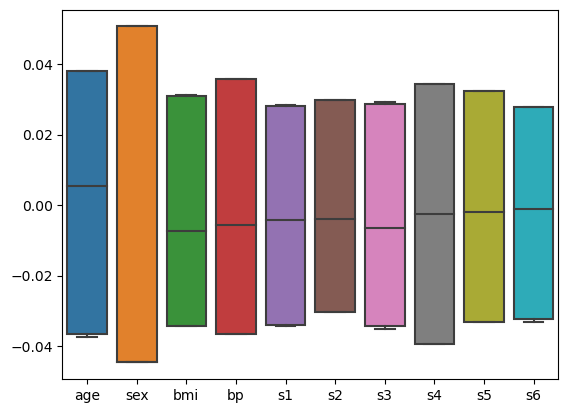

In [10]:
sns.boxplot(df)

In [11]:
df['target']=y

In [12]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.031248,0.021872,-0.034248,-0.030358,-0.035117,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.034229,-0.026328,-0.008449,-0.019163,0.029312,-0.039493,-0.033246,-0.033179,75.0
2,0.038076,0.050680,0.031248,-0.005670,-0.034248,-0.030358,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.037299,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.035117,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.034229,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.033179,135.0


<Axes: >

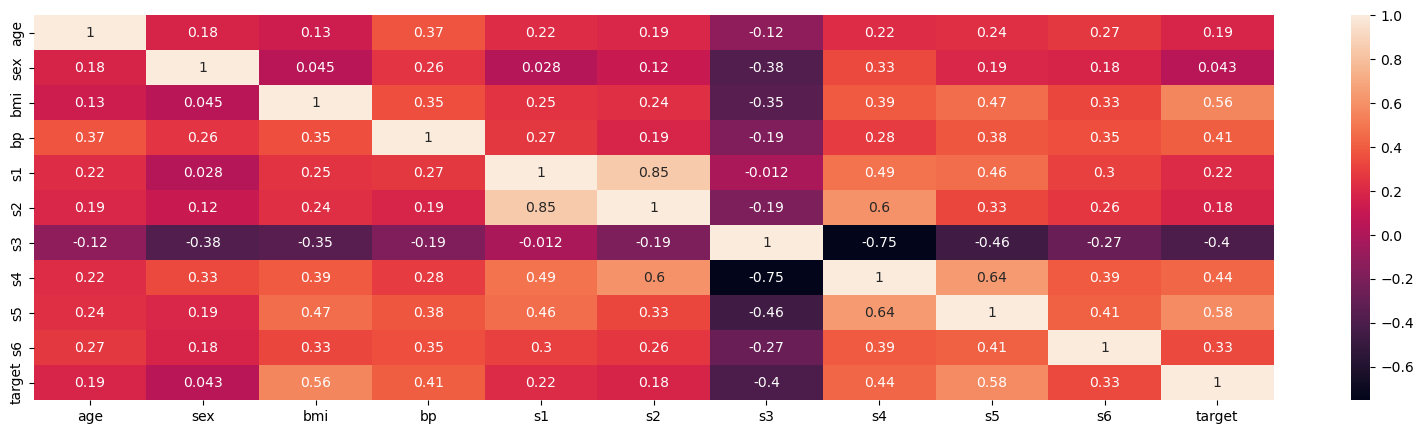

In [13]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)

In [14]:
x=df.drop('target',axis=1)

In [15]:
y=df['target']

In [16]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer

In [17]:
s=StandardScaler()
x_Stand=s.fit_transform(x)

In [18]:
x1=pd.DataFrame(x_Stand,columns=col1)
x1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1.203954,1.065488,1.307446,0.830246,-1.244779,-1.174413,-1.194776,0.070985,0.784125,-0.649115
1,-0.122722,-0.938537,-1.157709,-0.820456,-0.221508,-0.717706,1.288188,-1.127915,-1.179251,-1.282467
2,1.203954,1.065488,1.307446,-0.113012,-1.244779,-1.174413,-1.088363,0.070985,0.154471,-0.986902
3,-1.298639,-0.938537,-0.305556,-1.174178,0.597109,1.083572,-1.194776,1.269884,0.886822,-0.311327
4,0.118492,-0.938537,-1.157709,0.830246,0.269662,0.700321,0.472357,0.070985,-1.132785,-1.282467


In [19]:
from sklearn.feature_selection import SelectKBest

In [20]:
from sklearn.feature_selection import mutual_info_regression

In [21]:
a=SelectKBest(mutual_info_regression,k=4)

In [22]:
X=a.fit_transform(x1,y)

In [23]:
X.shape

(442, 4)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [26]:
from sklearn.svm import SVR

In [27]:
S=SVR()

In [28]:
S.fit(X_train,y_train)

SVR()

In [29]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [30]:
y_pred=S.predict(X_test)
A=r2_score(y_test,y_pred)
print("r2_Score:",A)

r2_Score: 0.3013362774447843


In [31]:
B=mean_squared_error(y_test,y_pred)
print("MSE:",B)

MSE: 3771.6017964179305


In [32]:
C=mean_absolute_error(y_test,y_pred)
print("MAE:",C)

MAE: 51.14850398736571


In [39]:
def svm_kernel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)
    kernel = ['linear', 'poly', 'rbf', 'sigmoid']
    r2=[]
    for i in kernel:
        S=SVR(kernel=i)
        S.fit(X_train,y_train)
        y_pred=S.predict(X_test)
        A=r2_score(y_test,y_pred)
        r2.append(A)
        
    return r2     
r2_based=svm_kernel(X,y)      

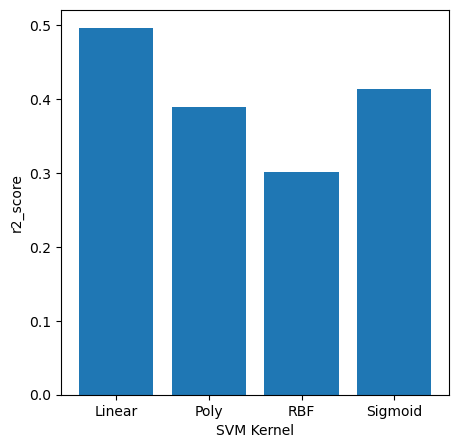

In [41]:
plt.figure(figsize=(5, 5))
plt.bar(np.arange(len(r2_based)), r2_based)
plt.xticks(np.arange(len(r2_based)), ['Linear', 'Poly', 'RBF', 'Sigmoid'])
plt.xlabel('SVM Kernel')
plt.ylabel('r2_score')
plt.show()